In [2]:
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import inspect
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv
from scipy.stats import trim_mean   # conda install scipy
from statsmodels import robust      # conda install -c conda-forge statsmodels 
import wquantiles                   # pip install wquantiles

import seaborn as sns
import matplotlib.pylab as plt

# 1º IMPORTACIÓN DE LOS DF
### RAPIDO ANÁLISIS

In [3]:
df_city = pd.read_csv('./data/diamonds_city_202208201409.csv')

In [4]:
#df_city.info() #compuesto por 15 filas y dos columnas sin nulos
df_city.head()

,city_id,city
0,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam
1,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...,Zurich
2,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,Las Vegas
3,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,New York City
4,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,Paris


In [5]:
df_clarity = pd.read_csv('./data/diamonds_clarity_202208201409.csv')

In [6]:
#df_clarity.info() #compuesto por 8 filas y 2 columnas sin nulos
df_clarity.head()

,clarity_id,clarity
0,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2
1,3f9db06236e9719b61c826b612b882fa702ec81574e44c...,VVS2
2,66686ae1f0c9c400ba32dc600a34ff0aa173395bcbc2d8...,VVS1
3,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,IF
4,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,SI1


In [7]:
df_color = pd.read_csv('./data/diamonds_color_202208201409.csv')

In [8]:
#df_color.info() #compuesto por 7 filas y 2 columnas sin nulos
df_color.head()

,color_id,color
0,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G
1,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,D
2,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,H
3,6da43b944e494e885e69af021f93c6d9331c78aa228084...,J
4,a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919...,I


In [9]:
df_cut = pd.read_csv('./data/diamonds_cut_202208201409.csv')

In [10]:
#df_cut.info() #compuesto por 5 filas y 2 columnas sin nulos
df_cut.head()

,cut_id,cut
0,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,Very Good
1,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,Ideal
2,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,Good
3,de88c121a82a06352bf1aaceba20578356408a334ba046...,Premium
4,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,Fair


In [11]:
df_dimensions = pd.read_csv('./data/diamonds_dimensions_202208201409.csv')

In [12]:
#df_dimensions.info() #compuesto por 40.455 filas y 6 columnas sin nulos
df_dimensions.head()

,index_id,depth,table,x,y,z
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95


In [13]:
df_properties = pd.read_csv('./data/diamonds_properties_202208201409.csv')

In [14]:
#df_properties.info() #compuesto de 40.455 filas y 4 columnas
df_properties.head()

,index_id,cut_id,color_id,clarity_id
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...


In [15]:
df_transactional = pd.read_csv('./data/diamonds_transactional_202208201409.csv')

In [16]:
#df_transactional.info() #compuesto de 40.455 filas y 4 columnas sin nulos
df_transactional.head()

,index_id,price,city_id,carat
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,89c7286890f7347ab235234e74d406596a127ae3679042...,1.21
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,0.32
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2686,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,0.71
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,738,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,0.41
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02


### Podemos observar cómo el df_properties contiene el enlace de unión entre todos los dfs menos del df_city que se une con df_transactional. Pasamos a realizar un merge de todos los dfs

# 2º Merge de todos los DFs y orden de columnas

In [17]:
df_diamonds = df_properties.merge(
    df_clarity, on="clarity_id", how="left").merge(
    df_color, on="color_id", how="left").merge(
    df_cut, on="cut_id", how="left").merge(
    df_dimensions, on="index_id", how="left").merge(
    df_transactional, on="index_id", how="left").merge(df_city, on="city_id", how="left")

In [18]:
df_diamonds.info() #compuesto por las 40.455 filas y 16 columnas sin nulos.
df_diamonds.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 0 to 40454
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index_id    40455 non-null  object 
 1   cut_id      40455 non-null  object 
 2   color_id    40455 non-null  object 
 3   clarity_id  40455 non-null  object 
 4   clarity     40455 non-null  object 
 5   color       40455 non-null  object 
 6   cut         40455 non-null  object 
 7   depth       40455 non-null  float64
 8   table       40455 non-null  float64
 9   x           40455 non-null  float64
 10  y           40455 non-null  float64
 11  z           40455 non-null  float64
 12  price       40455 non-null  int64  
 13  city_id     40455 non-null  object 
 14  carat       40455 non-null  float64
 15  city        40455 non-null  object 
dtypes: float64(6), int64(1), object(9)
memory usage: 5.2+ MB


,index_id,cut_id,color_id,clarity_id,clarity,color,cut,depth,table,x,y,z,price,city_id,carat,city
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,J,Premium,62.4,58.0,6.83,6.79,4.25,4268,89c7286890f7347ab235234e74d406596a127ae3679042...,1.21,Kimberly
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,H,Very Good,63.0,57.0,4.35,4.38,2.75,505,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,0.32,Antwerp
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,VS1,G,Fair,65.5,55.0,5.62,5.53,3.65,2686,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,0.71,London
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,SI1,D,Good,63.8,56.0,4.68,4.72,3.00,738,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,0.41,New York City
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,SI1,G,Ideal,60.5,59.0,6.55,6.51,3.95,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02,Dubai


In [19]:
#reordenamos el orden de las columnas
df_diamonds = df_diamonds[['city', 'clarity', 'color', 'cut', 'depth', 'table', 'x', 'y', 'z', 'price', 'carat', 'index_id', 'cut_id', 'color_id', 'clarity_id', 'city_id']]

In [20]:
df_diamonds

,city,clarity,color,cut,depth,table,x,y,z,price,carat,index_id,cut_id,color_id,clarity_id,city_id
0,Kimberly,VS2,J,Premium,62.4,58.0,6.83,6.79,4.25,4268,1.21,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,89c7286890f7347ab235234e74d406596a127ae3679042...
1,Antwerp,VS2,H,Very Good,63.0,57.0,4.35,4.38,2.75,505,0.32,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...
2,London,VS1,G,Fair,65.5,55.0,5.62,5.53,3.65,2686,0.71,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...
3,New York City,SI1,D,Good,63.8,56.0,4.68,4.72,3.00,738,0.41,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...
4,Dubai,SI1,G,Ideal,60.5,59.0,6.55,6.51,3.95,4882,1.02,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,New York City,VS1,G,Ideal,62.7,57.0,7.10,7.04,4.43,10070,1.34,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...
40451,Zurich,SI2,F,Good,57.1,60.0,8.31,8.25,4.73,12615,2.02,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...
40452,Tel Aviv,SI1,H,Ideal,62.7,56.0,6.37,6.42,4.01,5457,1.01,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...
40453,Paris,VS1,J,Ideal,61.9,54.3,4.45,4.47,2.76,456,0.33,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...


# 3º EDA

## Estimates of Location

### Media:

In [20]:
for column in df_diamonds.columns[4:11]:
    mean_column = df_diamonds[column].mean()
    print(f'{column} mean:', round(mean_column, 3))

depth mean: 61.753
table mean: 57.446
x mean: 5.729
y mean: 5.733
z mean: 3.537
price mean: 3928.444
carat mean: 0.798


### Weighted mean:

In [21]:
#wmean_depth = np.average(df_diamonds['depth'], weights=df_diamonds['depth'])

### Trimmed mean

In [22]:
for column in df_diamonds.columns[4:11]:
    tmean_column = trim_mean(df_diamonds[column], 0.1)
    print(f'{column} trimmed_mean:', round(tmean_column, 3))

#la media depth parece ser robusta al estar muy próxima a su media normal
#la media table parece ser robusta al estar muy próxima
#con Price aquí sí que parece haber una gran diferencia respecto a su media
#Diferencia a tener en cuenta en Carat respecto a su media

depth trimmed_mean: 61.786
table trimmed_mean: 57.307
x trimmed_mean: 5.657
y trimmed_mean: 5.66
z trimmed_mean: 3.493
price trimmed_mean: 3153.223
carat trimmed_mean: 0.734


### Median:

In [23]:
for column in df_diamonds.columns[4:11]:
    median_column = df_diamonds[column].median()
    mean_column = df_diamonds[column].mean()
    tmean_column = trim_mean(df_diamonds[column], 0.1)
    print(f'{column} median vs mean vs tri_mean:', round(median_column, 2), '//', round(mean_column, 2),
          '//', round(tmean_column, 2))
    
#Depth: media y mediana se encuentran muy próximas. Son buena medida central
#Table: media y mediana se encuentran muy próximas. Son buena medida central
#Price: media y mediana están lejos. Incluso trimmed media de median
#Carat: media y mediana están lejos

# Conclusiones:
# - los gustos de la gente son muy similares o los diseños de los diamantes no dan a lugar a mucha imaginación
# - buscando la forma simétrica de un cuadrado por ser X e Y muy parecidos. Figura de cuadrado.

depth median vs mean vs tri_mean: 61.8 // 61.75 // 61.79
table median vs mean vs tri_mean: 57.0 // 57.45 // 57.31
x median vs mean vs tri_mean: 5.69 // 5.73 // 5.66
y median vs mean vs tri_mean: 5.71 // 5.73 // 5.66
z median vs mean vs tri_mean: 3.52 // 3.54 // 3.49
price median vs mean vs tri_mean: 2397.0 // 3928.44 // 3153.22
carat median vs mean vs tri_mean: 0.7 // 0.8 // 0.73


## Estimates of Variability

### Deviations

In [24]:
for column in df_diamonds.columns[4:11]:
    df_diamonds[f'dev_{column}'] = df_diamonds[column].mean() - df_diamonds[column]
    print(f'{column} deviation:', df_diamonds[f'dev_{column}'].sum())
    
# se comprueba que todas ellas tienden a cero, neteando todas las diferencias de cada una respecto a la media.

depth deviation: 3.46190631717036e-09
table deviation: -2.384012987022288e-10
x deviation: -9.476366358285304e-10
y deviation: 2.686846301003243e-10
z deviation: -1.33347555220098e-10
price deviation: -7.043126970529556e-09
carat deviation: -1.5804957342879788e-10


### Mean absolute deviation

In [25]:
for column in df_diamonds.columns[4:11]:
    df_diamonds[f'mean_dev_{column}'] = abs(df_diamonds[column].mean() - df_diamonds[column])
    print(f'{column} mean absolute deviation:', 
          df_diamonds[f'mean_dev_{column}'].sum() / len(df_diamonds[f'mean_dev_{column}']))

depth mean absolute deviation: 1.0272593622772639
table mean absolute deviation: 1.7673116453841442
x mean absolute deviation: 0.9565134918322857
y mean absolute deviation: 0.9513196540629539
z mean absolute deviation: 0.5930883488050529
price mean absolute deviation: 3034.0658933710733
carat mean absolute deviation: 0.3859125401102314


### Variance

In [26]:
for column in df_diamonds.columns[4:11]:
    df_diamonds[f'var_{column}'] = (df_diamonds[column].mean() - df_diamonds[column])**2
    variance = df_diamonds[f'var_{column}'].sum() / (len(df_diamonds[f'var_{column}']) - 1)
    print(f'{column} Variance:', round(variance, 3))

# ¿de qué sirve tener como concepto la varianza? Bien, 
# aunque la interpretación del valor que arroja no nos da demasiada información, 
# su cálculo es necesario para obtener el valor de otros parámetros (covarianza, matrices econométricas).

# De aquí no sacamos ninguna posible conclusión clara.

depth Variance: 2.05
table Variance: 4.989
x Variance: 1.264
y Variance: 1.315
z Variance: 0.486
price Variance: 15939386.688
carat Variance: 0.226


### Standard deviation

In [27]:
for column in df_diamonds.columns[4:11]:
    std_dev = df_diamonds[column].std()
    std_dev_p = (std_dev / df_diamonds[column].mean())* 100
    print(f'{column} Standard deviation:', round(std_dev, 3), 'que supone un', round(std_dev_p, 2), '% respecto a su media')
    
# cuanto mayor sea la dispersión mayor es la desviación estándar, si no hubiera ninguna variación en los datos, 
# es decir, si fueran todos iguales, la desviación estándar sería cero. 
# La desviación estándar cuantifica la dispersión alrededor de la media aritmética. 
# Informa de la media de distancias que tienen los datos respecto de su media aritmética.
# Si la muestra representara una distribución normal podríamos decir que: 
# el 68% se encuentran en +- una vez la standard deviation respecto a la media
# el 95% se encuentra en +- 1,96 veces la standard deviation respecto a la media

# Puede resultar interesante calcular de cada uno si en muy representativo respecto a la media

#Conclusiones:
# - Depth y Table nos deberían de mostrar resultados muy poco dispersos como ya vimos con su media, y mediana
# - X, Y, Z muestran unas desviaciones no muy altas y lo curioso es que entre ellas son muy similares lo
# que se podría interpretar como proporcionalidad en el diseño de la forma de los diamantes
# - Price y Carat sus desviaciones suponen mucha diferencia, lo que se podría interpretar como que 
# por muy pequeña que sea la variación en sus medidas, varía mucho su precio y algo menos los quilates.

depth Standard deviation: 1.432 que supone un 2.32 % respecto a su media
table Standard deviation: 2.234 que supone un 3.89 % respecto a su media
x Standard deviation: 1.124 que supone un 19.63 % respecto a su media
y Standard deviation: 1.147 que supone un 20.0 % respecto a su media
z Standard deviation: 0.697 que supone un 19.71 % respecto a su media
price Standard deviation: 3992.416 que supone un 101.63 % respecto a su media
carat Standard deviation: 0.476 que supone un 59.61 % respecto a su media


### Order statistics (spread of sorted data)

In [28]:
# No me fío. Analizar la finalidad de esto.

#feature = 'depth'

#order_data = df_diamonds[['State', feature]].sort_values(by=[feature]).reset_index(drop=True)

#order_data

### Range

In [29]:
for column in df_diamonds.columns[4:11]:
    diamonds_range = df_diamonds[column].max() - df_diamonds[column].min()
    print(f'{column} range:', diamonds_range, ', siendo su mínimo:', df_diamonds[column].min(), 'y su máximo:', 
          df_diamonds[column].max())

# Conclusiones:
# - Extraño que si X e Y estaban tan parejos ahora muestren unos rangos tan dispares. En algunos diseños no cumple
# la proporcionalidad y podría derivarse de peticiones muy específicas.
# - Por lo tanto analizamos cuando x, y, z son máximo y mínimo. Lo mismo con el precio.

depth range: 36.0 , siendo su mínimo: 43.0 y su máximo: 79.0
table range: 52.0 , siendo su mínimo: 43.0 y su máximo: 95.0
x range: 10.23 , siendo su mínimo: 0.0 y su máximo: 10.23
y range: 58.9 , siendo su mínimo: 0.0 y su máximo: 58.9
z range: 8.06 , siendo su mínimo: 0.0 y su máximo: 8.06
price range: 18497 , siendo su mínimo: 326 y su máximo: 18823
carat range: 4.3 , siendo su mínimo: 0.2 y su máximo: 4.5


In [30]:
# Mínimos:
df_diamonds[df_diamonds['x']==0] #son 5 filas
#df_diamonds[df_diamonds['y']==0] #son 4 filas
#df_diamonds[df_diamonds['z']==0] #son 16 filas
#df_diamonds[df_diamonds['price']==326] #medidas de x,y,z próximos a su media.

# Máximos:
#df_diamonds[df_diamonds['x']==10.23] #en máximo el precio (18.531) es muy próximo a su máximo
#df_diamonds[df_diamonds['y']==58.9] #llama la atención el valor tan bajo de x (8.09) y pero coincide con max de z(8.06)
#df_diamonds[df_diamonds['z']==8.06] #mismo caso que el anterior. Representa un precio alto que se podría considerar acorde.
#df_diamonds[df_diamonds['price']==18823] #no se corresponde con medidas máximas incluso ni en depth y table.

,city,clarity,color,cut,depth,table,x,y,z,price,...,mean_dev_z,mean_dev_price,mean_dev_carat,var_depth,var_table,var_x,var_y,var_z,var_price,var_carat
6465,Paris,SI2,F,Good,64.1,60.0,0.0,0.00,0.0,2130,...,3.537154,1798.444469,0.087706,5.509153,6.522238,32.825929,32.865210,12.511456,3.234403e+06,0.007692
14815,Amsterdam,SI2,F,Ideal,61.6,56.0,0.0,6.62,0.0,4954,...,3.537154,1025.555531,0.272294,0.023361,2.091300,32.825929,0.787091,12.511456,1.051764e+06,0.074144
26192,Amsterdam,SI2,H,Premium,62.8,59.0,0.0,0.00,0.0,18034,...,3.537154,14105.555531,1.452294,1.096541,2.414503,32.825929,32.865210,12.511456,1.989667e+08,2.109159
28029,Zurich,SI2,F,Good,64.1,60.0,0.0,0.00,0.0,2130,...,3.537154,1798.444469,0.087706,5.509153,6.522238,32.825929,32.865210,12.511456,3.234403e+06,0.007692
34423,Amsterdam,VS1,G,Fair,57.5,67.0,0.0,0.00,0.0,6381,...,3.537154,2452.555531,0.342294,18.086660,91.276380,32.825929,32.865210,12.511456,6.015029e+06,0.117165


### Percentiles (it is NOT a data point)

In [31]:
for column in df_diamonds.columns[4:11]:
    per_75 = df_diamonds[column].quantile(0.75)
    per_25 = df_diamonds[column].quantile(0.25)
    per_50 = df_diamonds[column].quantile(0.50)
    print(f'----------- {column} -------------')
    print('Percentile 75th:', per_75, '\nPercentile 50th:', per_50, '\nPercentile 25th:', per_25)

# Interpretación:
# En el caso de Price el 75% de los valores está por debajo de 5.33. El 50%, coincide con el valor de la mediana.

# Conclusiones:
# Una vez más nos llama la atención de Price donde teniendo un valor máximo de 18.823, el 75% de los valores son inferiores
# a 5.331. Un valor muy alejado del máximo sabiendo que no puede haber negativos en una variable de precio de venta.

----------- depth -------------
Percentile 75th: 62.5 
Percentile 50th: 61.8 
Percentile 25th: 61.0
----------- table -------------
Percentile 75th: 59.0 
Percentile 50th: 57.0 
Percentile 25th: 56.0
----------- x -------------
Percentile 75th: 6.54 
Percentile 50th: 5.69 
Percentile 25th: 4.71
----------- y -------------
Percentile 75th: 6.54 
Percentile 50th: 5.71 
Percentile 25th: 4.72
----------- z -------------
Percentile 75th: 4.035 
Percentile 50th: 3.52 
Percentile 25th: 2.91
----------- price -------------
Percentile 75th: 5331.0 
Percentile 50th: 2397.0 
Percentile 25th: 945.0
----------- carat -------------
Percentile 75th: 1.04 
Percentile 50th: 0.7 
Percentile 25th: 0.4


### Interquartile range

In [32]:
for column in df_diamonds.columns[4:11]:
    per_75 = df_diamonds[column].quantile(0.75)
    per_25 = df_diamonds[column].quantile(0.25)
    iqr = per_75 - per_25
    iqr_perc = (iqr / df_diamonds[column].median())* 100
    print(f'{column} interquartile range:', round(iqr, 3), 'que representa el', round(iqr_perc, 3), '% sobre su mediana')

# Interpretación:
# Muestra la dispersión de valor en la que se encuentran el 50% de los valores más centrales.

# Conclusiones:
# Vemos de nuevo la alta dispersión de los valores en el precio a diferencia de los valores en Depth y/o Table.
# Se podría interpretar que el precio es muy sensible a las medidas del diamante
# X, Y, Z parece que siguen manteniendo esa proporcionalidad.

depth interquartile range: 1.5 que representa el 2.427 % sobre su mediana
table interquartile range: 3.0 que representa el 5.263 % sobre su mediana
x interquartile range: 1.83 que representa el 32.162 % sobre su mediana
y interquartile range: 1.82 que representa el 31.874 % sobre su mediana
z interquartile range: 1.125 que representa el 31.96 % sobre su mediana
price interquartile range: 4386.0 que representa el 182.979 % sobre su mediana
carat interquartile range: 0.64 que representa el 91.429 % sobre su mediana


## Exploring the Data Distribution

### Boxplot (Matplotlib whiskers implementation = 1.5 IQR)

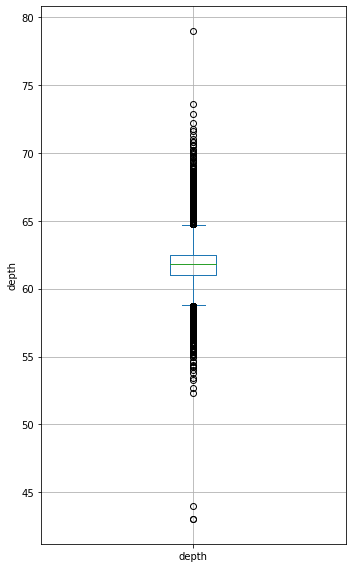

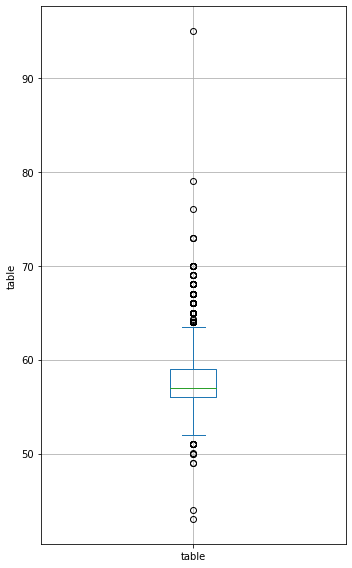

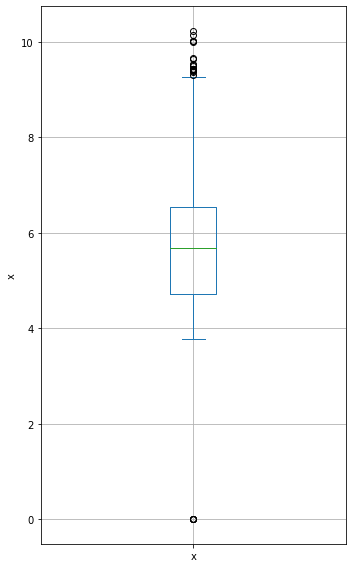

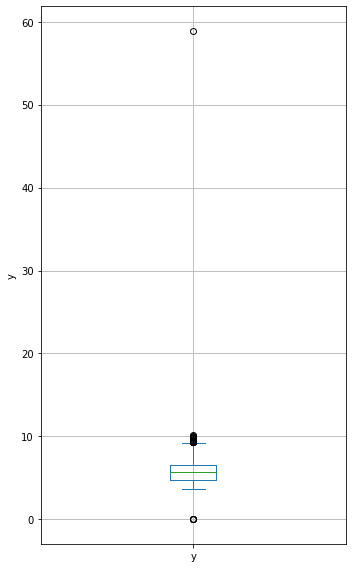

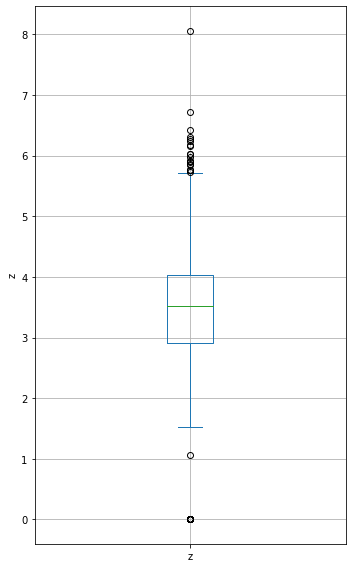

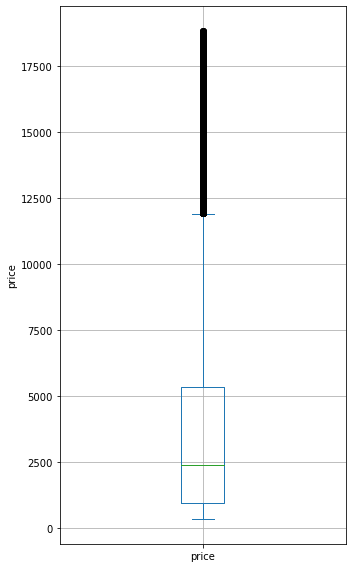

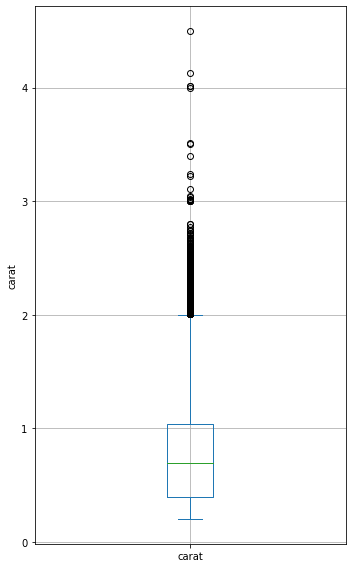

In [33]:
for column in df_diamonds.columns[4:11]:
    data = df_diamonds[column]
    ax = data.plot.box(figsize=(5, 8))
    ax.set_ylabel(column)
    #ax.boxplot(data, whis=[0, 100])
    plt.tight_layout()
    plt.grid()
    plt.show()

# Interpretación:
# El interior de la caja marca el límite inferior del percentil 25 y el superior del 75
# La línea interior es la mediana
# Los bigotes pueden llegar a marcar un máximo de +-1,5 veces la desviación stándar.

# Conclusiones:
# Muchas veces el visual únicamente puede llevarnos a engaño debido a las escalas como sucede comparando los gráficos x e Y.
# Con X e Y venimos viendo su alta relación pero visualmente diríamos que los valores de Y están más concentrados que en X.

###  Percentiles table (equal-count bins). Quartiles and Deciles are usually used

In [34]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
percentiles = df_diamonds['depth'].quantile(percentages)
df_per = pd.DataFrame(percentiles)
df_per.index = [f'{p * 100}%' for p in percentages]
df_per = df_per.transpose()

for column in df_diamonds.columns[5:11]:
    percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
    percentiles = df_diamonds[column].quantile(percentages)
    df_per_column = pd.DataFrame(percentiles)
    df_per_column.index = [f'{p * 100}%' for p in percentages]
    df_per_column = df_per_column.transpose()
    df_per = pd.concat([df_per, df_per_column], axis=0,)

df_per

# Interpretación:
# mismo que lo que veíamos en los percentiles pero incluyendo 5% y 95%

# Conclusiones:
# la proporcionalidad de X e Y.

,5.0%,25.0%,50.0%,75.0%,95.0%
depth,59.30,61.00,61.80,62.500,63.80
table,54.00,56.00,57.00,59.000,61.00
x,4.29,4.71,5.69,6.540,7.67
y,4.30,4.72,5.71,6.540,7.65
z,2.65,2.91,3.52,4.035,4.74
price,544.00,945.00,2397.00,5331.000,13132.00
carat,0.30,0.40,0.70,1.040,1.71


### Frequency table (equal-size bins)

In [35]:
for column in df_diamonds.columns[4:11]:
    df_diamonds[f'binned_{column}'] = pd.cut(df_diamonds[column], 10)
    # Los siguientes pasos muestran otra lógica de cómo hacer este proceso pero que por alguna razón no me funcionaba en el loop
    #binnedPopulation = pd.cut(df_diamonds[column], 10)
    #binnedPopulation.head()
    #binnedPopulation.value_counts()
    #binnedPopulation.name = f'binned_{column}'
    #df_bin = pd.concat([df_diamonds, binnedPopulation], axis=1)
    #df_bin = df_bin.sort_values(by=column)
    
df_diamonds.head()

# Interpretación:
# asignamos un número específico de intervalos (bins) a un feature. Dicho número divide el rango de la muestra en cajitas
# del mismo tamaño por lo que el número de valores que caen en cada intervalo no tienen por qué ser iguales.
# Lo que sucedía en los percentiles es que cada una de las 4 cajas contenía el mismo número de valores.

,city,clarity,color,cut,depth,table,x,y,z,price,...,var_z,var_price,var_carat,binned_depth,binned_table,binned_x,binned_y,binned_z,binned_price,binned_carat
0,Kimberly,VS2,J,Premium,62.4,58.0,6.83,6.79,4.25,4268,...,0.508150,1.152980e+05,0.169987,"(61.0, 64.6]","(53.4, 58.6]","(6.138, 7.161]","(5.89, 11.78]","(4.03, 4.836]","(4025.4, 5875.1]","(1.06, 1.49]"
1,Antwerp,VS2,H,Very Good,63.0,57.0,4.35,4.38,2.75,505,...,0.619611,1.171997e+07,0.228203,"(61.0, 64.6]","(53.4, 58.6]","(4.092, 5.115]","(-0.0589, 5.89]","(2.418, 3.224]","(307.503, 2175.7]","(0.196, 0.63]"
2,London,VS1,G,Fair,65.5,55.0,5.62,5.53,3.65,2686,...,0.012734,1.543668e+06,0.007692,"(64.6, 68.2]","(53.4, 58.6]","(5.115, 6.138]","(-0.0589, 5.89]","(3.224, 4.03]","(2175.7, 4025.4]","(0.63, 1.06]"
3,New York City,SI1,D,Good,63.8,56.0,4.68,4.72,3.00,738,...,0.288534,1.017894e+07,0.150316,"(61.0, 64.6]","(53.4, 58.6]","(4.092, 5.115]","(-0.0589, 5.89]","(2.418, 3.224]","(307.503, 2175.7]","(0.196, 0.63]"
4,Dubai,SI1,G,Ideal,60.5,59.0,6.55,6.51,3.95,4882,...,0.170442,9.092682e+05,0.049415,"(57.4, 61.0]","(58.6, 63.8]","(6.138, 7.161]","(5.89, 11.78]","(3.224, 4.03]","(4025.4, 5875.1]","(0.63, 1.06]"


### Histogram (or plotting the frequency table)

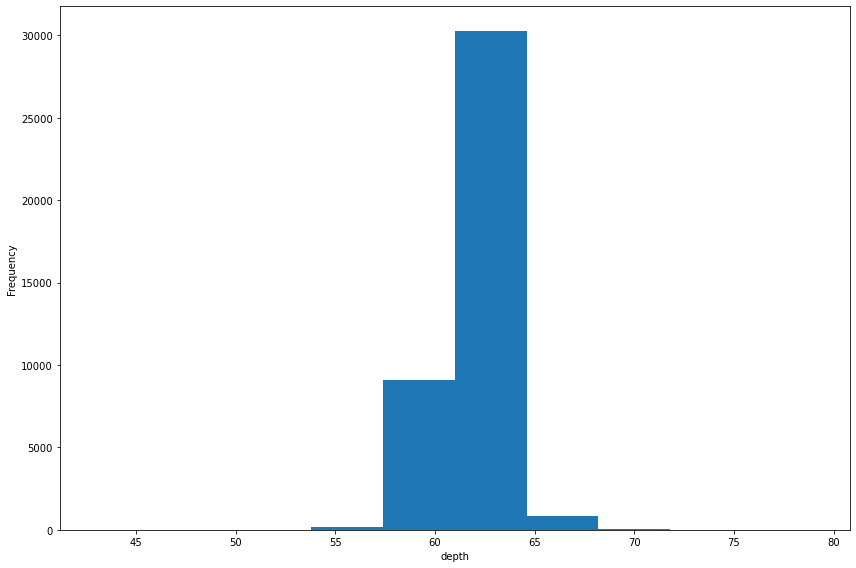

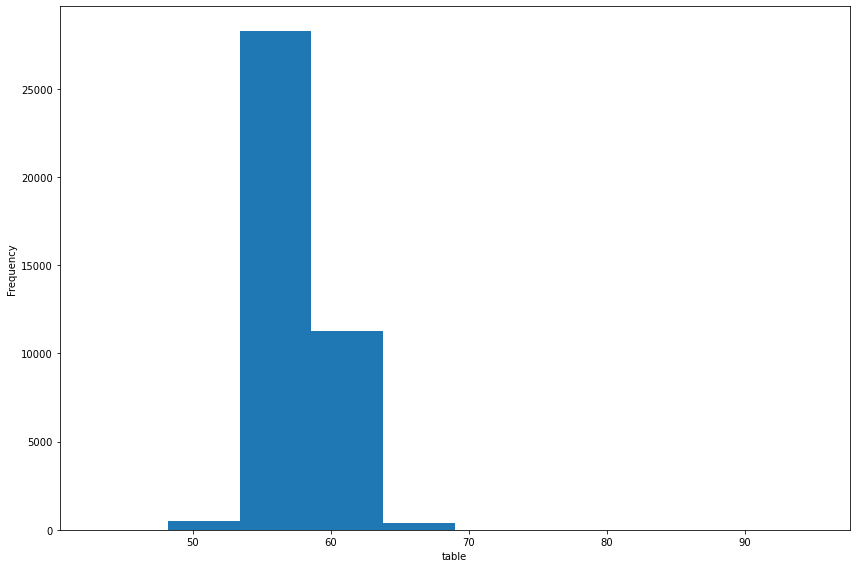

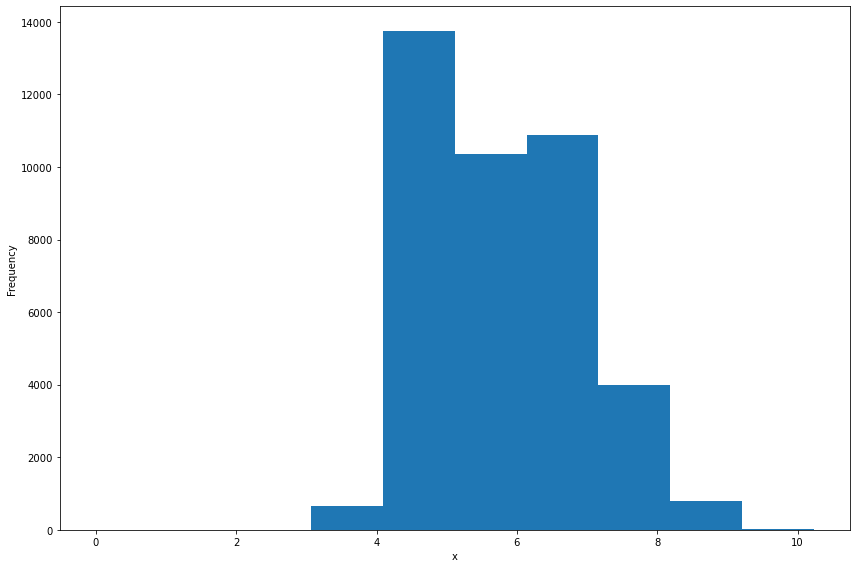

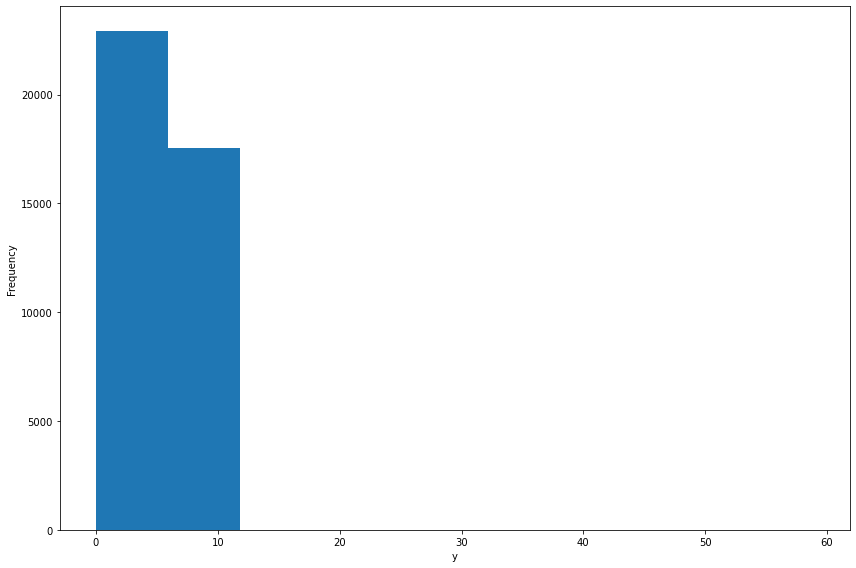

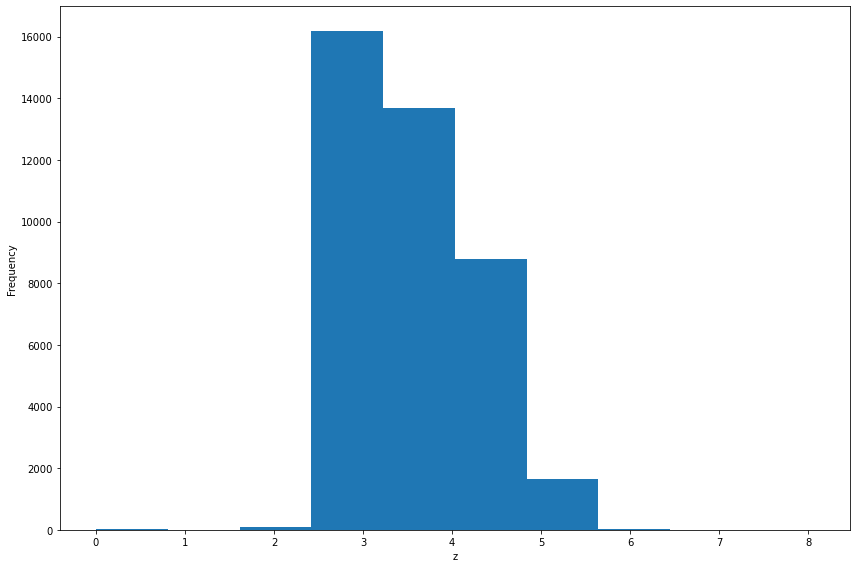

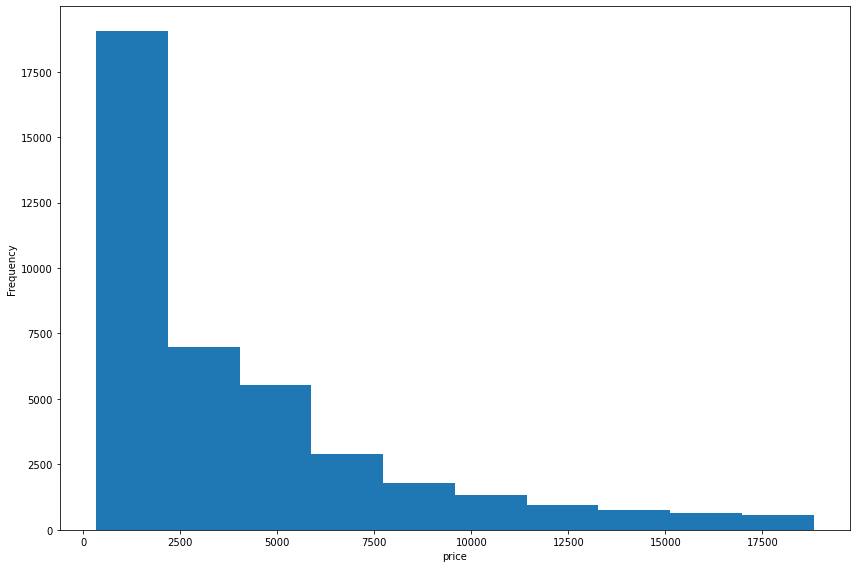

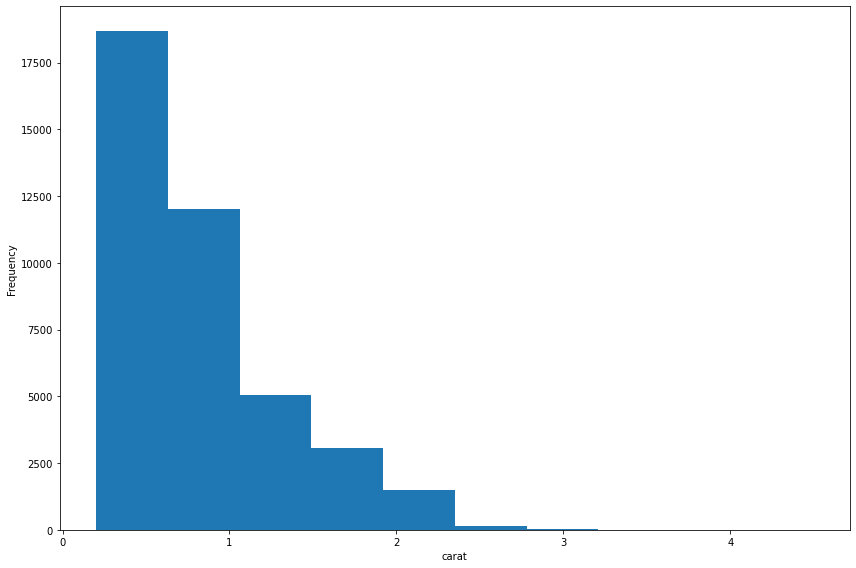

In [36]:
for column in df_diamonds.columns[4:11]:
    data = df_diamonds[column]
    ax = data.plot.hist(figsize=(12, 8))
    ax.set_xlabel(column)
    plt.tight_layout()
    plt.show()

# Interpretación:
# Tabla de frecuencias de los valores de una feature

# Conclusiones:
# Table, Depth, X, Y, Z mantienen visuales de concentración mientras que Price y Carat muestran cierta similitud
# Veníamos viendo que X e Y eran muy similares pero en el gráfico al usar diferente escala nos podría dar una señal no
# tan similar.

### Density plot calculated from data using a kernel density estimate implementation (area under the curve == 1)

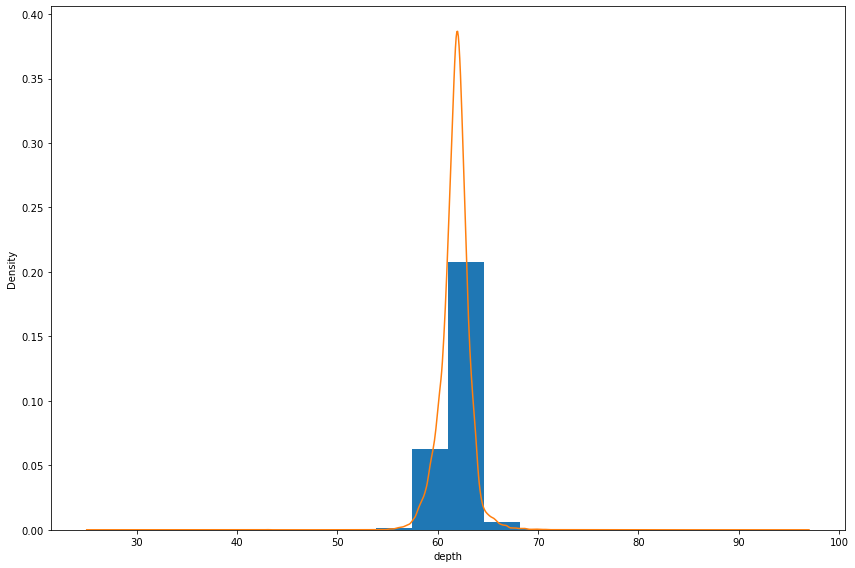

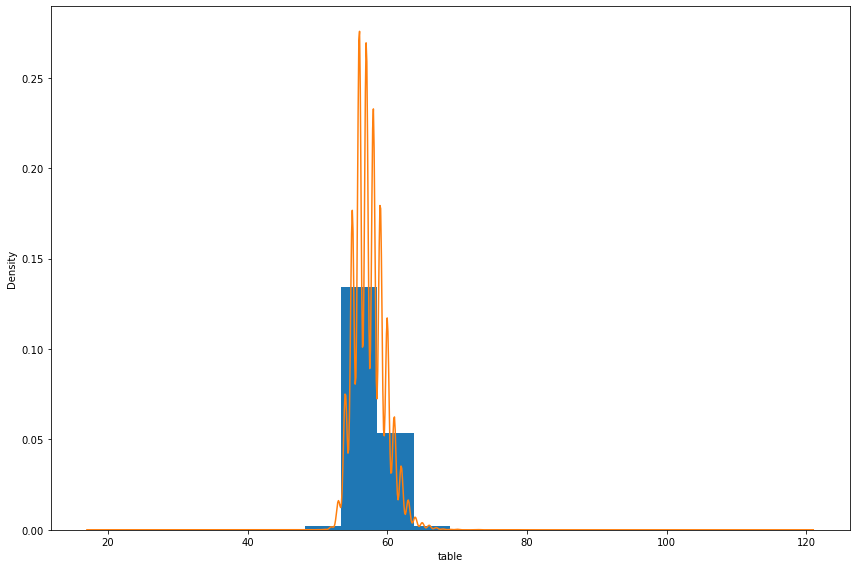

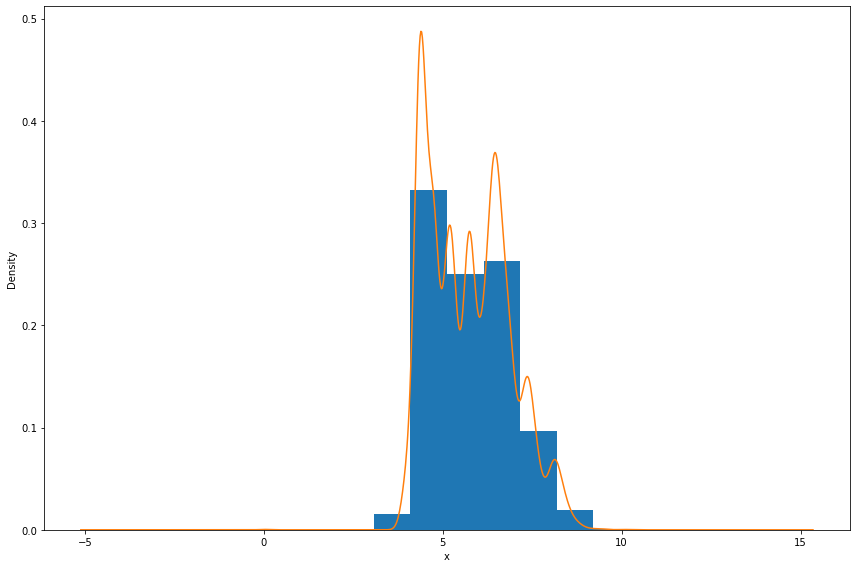

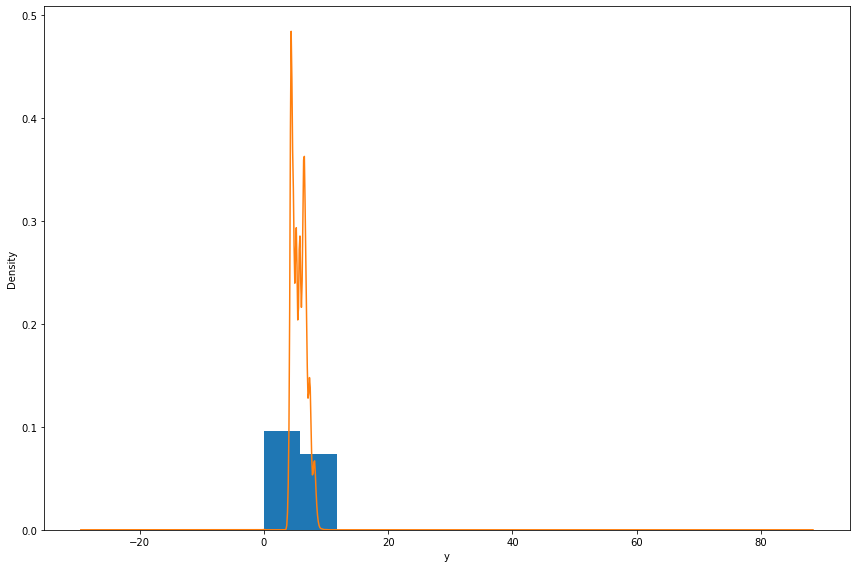

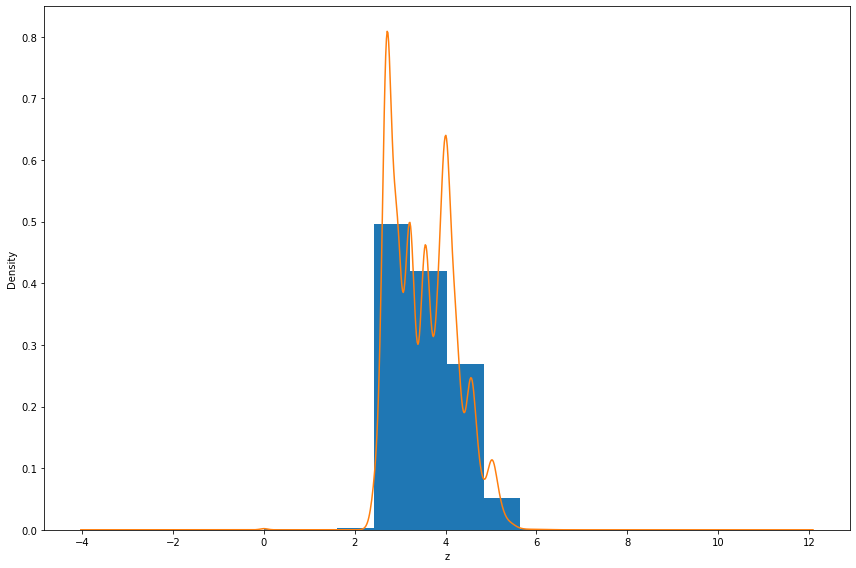

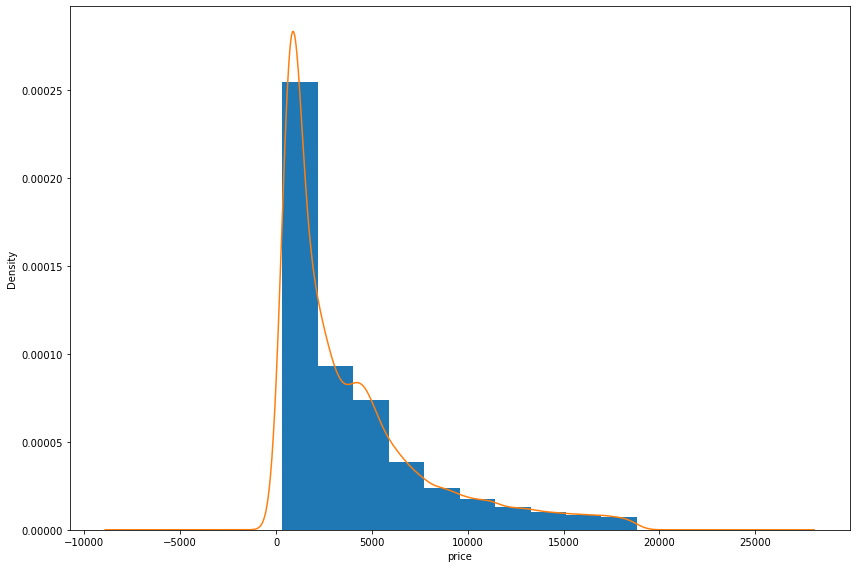

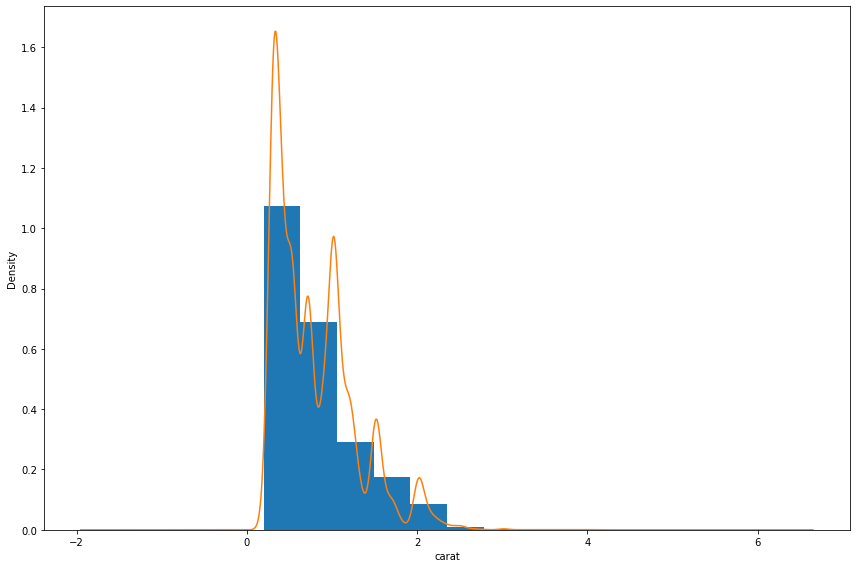

In [37]:
for column in df_diamonds.columns[4:11]:
    data = df_diamonds[column]
    ax = data.plot.hist(density=True,
                        #xlim=[0, 12], 
                        #bins=range(1,12),
                        figsize=(12, 8))
    data.plot.density(ax=ax)
    ax.set_xlabel(column)
    plt.tight_layout()
    plt.show()
    
# Conclusiones:
# En esta ocasión, a misma escala los gráficos de X e Y sí se parecen mucho más.

## Exploring Binary and Categorical Data

### Category proportions

In [38]:
for column in df_diamonds.columns[:4]:
    df_c = pd.DataFrame(df_diamonds[column].value_counts())
    dfc_proportions = 100 * df_c / df_c.values.sum()
    print(dfc_proportions)
    
# Interpretación:
# Muestra el peso dentro de una feature de cada categoría    
    
# Conclusiones:
# se podría decir que esta muestra no está perfectamente balanceada si la midiéramos por ejemplo por la ciudad, ya que hay 
# en 3 ciudades donde se vende el doble.

                    city
Antwerp        12.512668
Surat          12.475590
Kimberly       12.458287
Zurich          6.412063
Paris           6.374985
Las Vegas       6.323075
Amsterdam       6.288469
Tel Aviv        6.261278
Luxembourg      6.239031
Madrid          6.189593
New York City   6.167346
Dubai           6.150043
London          6.147571
        clarity
SI1   24.098381
VS2   22.859968
SI2   17.127673
VS1   14.994438
VVS2   9.390681
VVS1   6.857002
IF     3.280188
I1     1.391670
       color
G  20.899765
E  18.106538
F  17.740700
H  15.516005
D  12.480534
I   9.966630
J   5.289828
                 cut
Ideal      40.093932
Premium    25.361513
Very Good  22.481770
Good        9.054505
Fair        3.008281


### Mode 

In [39]:
for column in df_diamonds.columns[:11]:
    print(f'{column}:', df_diamonds[column].mode()[0])

#Interpretación:
# Lo que más se repite de categoría dentro de una feature

# Conclusión:
# No por ello todos estos resultados deberían de coincidir en una misma venta, tal y como vamos a intentar comprobar

city: Antwerp
clarity: SI1
color: G
cut: Ideal
depth: 61.9
table: 56.0
x: 4.37
y: 4.37
z: 2.69
price: 605
carat: 0.3


In [31]:
df_diamonds.loc[(df_diamonds['city']=='Antwerp') & (df_diamonds['clarity']=='SI1') & 
                (df_diamonds['cut']=='ideal') & 
                (df_diamonds['color']=='G')]

# no hay ningún diamante que cumpla con los valores más repetidos

,city,clarity,color,cut,depth,table,x,y,z,price,carat,index_id,cut_id,color_id,clarity_id,city_id


### Bar charts can be understand it as not ordered (arbitrary) bins.

## Correlation (bivariate analysis)

### Correlation matrix

In [22]:
df_diamonds[:11].corr()

# Interpretación:
# La correlación se mide entre -1  y 1. Siendo 0 no correlacionadas, 1 correlación positiva y -1 corr negativa.

,depth,table,x,y,z,price,carat
depth,1.000000,-0.470300,-0.288638,-0.302192,-0.172134,-0.379521,-0.280951
table,-0.470300,1.000000,0.359658,0.355302,0.306105,0.273728,0.329669
x,-0.288638,0.359658,1.000000,0.999239,0.992536,0.949982,0.991897
y,-0.302192,0.355302,0.999239,1.000000,0.990804,0.955552,0.993504
z,-0.172134,0.306105,0.992536,0.990804,1.000000,0.931158,0.986748
price,-0.379521,0.273728,0.949982,0.955552,0.931158,1.000000,0.964667
carat,-0.280951,0.329669,0.991897,0.993504,0.986748,0.964667,1.000000


### Correlation matrix heatmap

In [24]:
df_selec = df_diamonds[['depth', 'table', 'x', 'y', 'z', 'price', 'carat']]
df_selec.head()

,depth,table,x,y,z,price,carat
0,62.4,58.0,6.83,6.79,4.25,4268,1.21
1,63.0,57.0,4.35,4.38,2.75,505,0.32
2,65.5,55.0,5.62,5.53,3.65,2686,0.71
3,63.8,56.0,4.68,4.72,3.00,738,0.41
4,60.5,59.0,6.55,6.51,3.95,4882,1.02


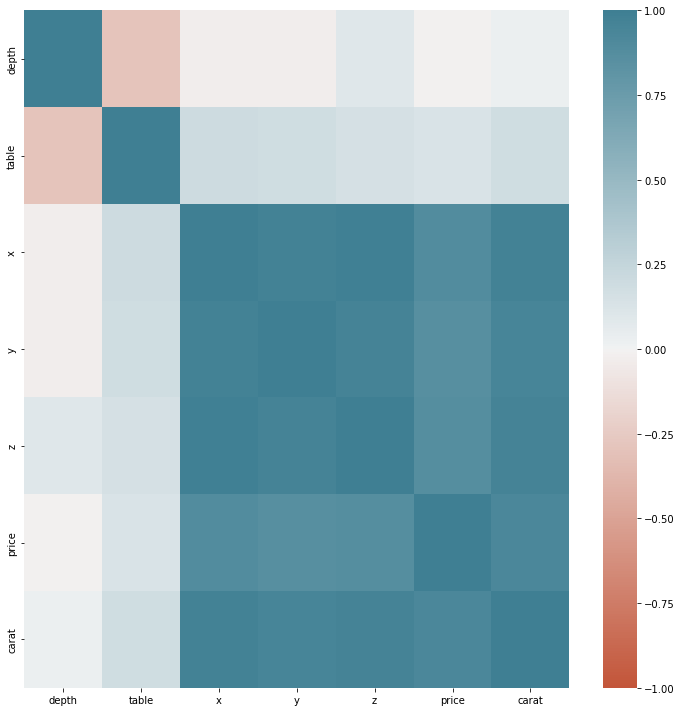

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df_selec.corr(),
                 vmin=-1,
                 vmax=1,
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 # https://seaborn.pydata.org/generated/seaborn.diverging_palette.html
                 ax=ax)
plt.tight_layout()

# Conclusiones:
# Se confirma la clara correlación entre X, Y, Z.
# La Densidad (Carat) tiene correlación positiva también con X, Y, Z, lo que podría tener sentido a mayor tamaño de diamante
# El precio aunque tiene correlación positiva con X, Y, Z, no es tan directa y por lo tanto habrá otros factores que influyan
# en el mismo como por ejemplo las regiones geográficas de dónde se venden.
# Me sorprende la correlación negativa entre depth y table, y la nula correlación que tienen ambos con X y Z, siendo resultado 
# de una operación matemática de cada una de estar variables.

### Scatterplots (dominant quadrants give correlation info)

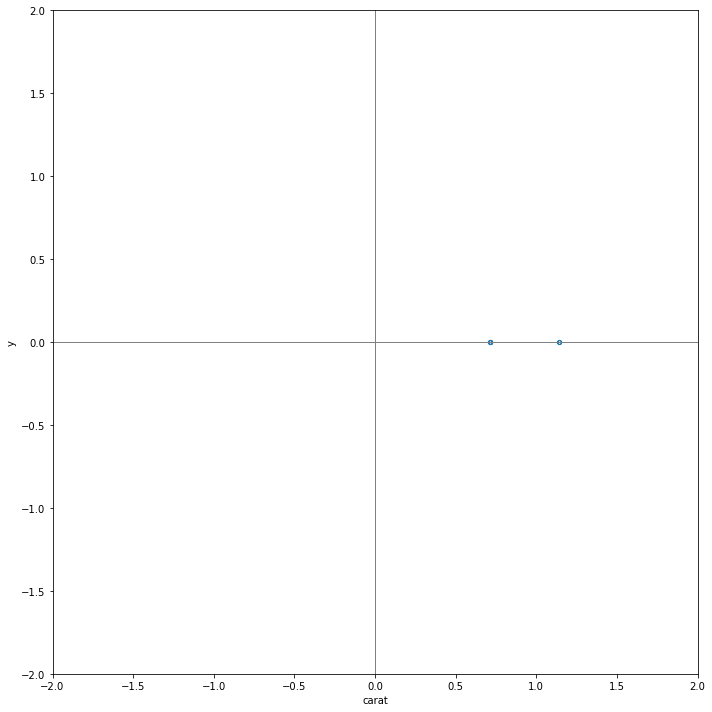

In [64]:
ax = df_selec.plot.scatter(x='carat',
                          y='y',
                          figsize=(10, 10),
                          marker='$\u25EF$',
                          alpha=1)
ax.set_xlabel('carat')
ax.set_ylabel('y')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.tight_layout()

## Exploring Two or More Variables (Multivariate analysis)

### Hexagonal bining plot

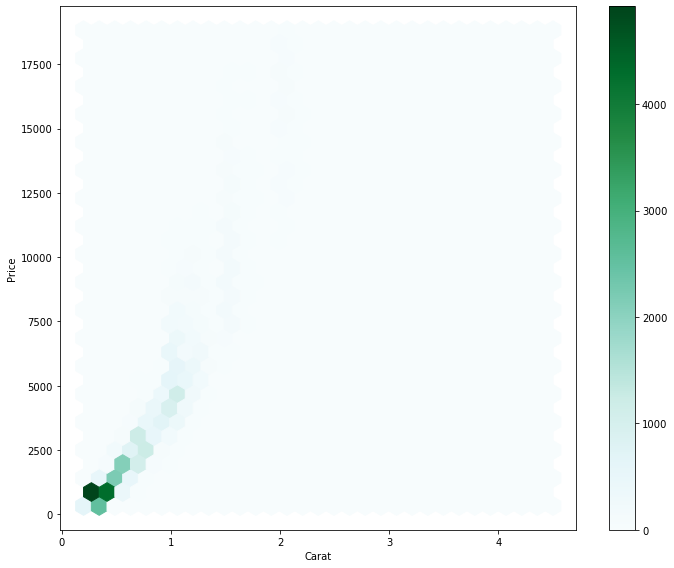

In [67]:
ax = df_selec.plot.hexbin(x='carat',
                         y='price',
                         gridsize=30,
                         sharex=False,     
                         figsize=(10, 8))
ax.set_xlabel('Carat')
ax.set_ylabel('Price')
plt.tight_layout()

# Interpretación:
# Se comparan dos variables donde en cada exágono se localiza cada bin de dicha variable

# Conclusión:
# En este ejemplo podemos ver la correlación entre precio y densidad por la línea creciente positiva que se intuye

### Contour plot

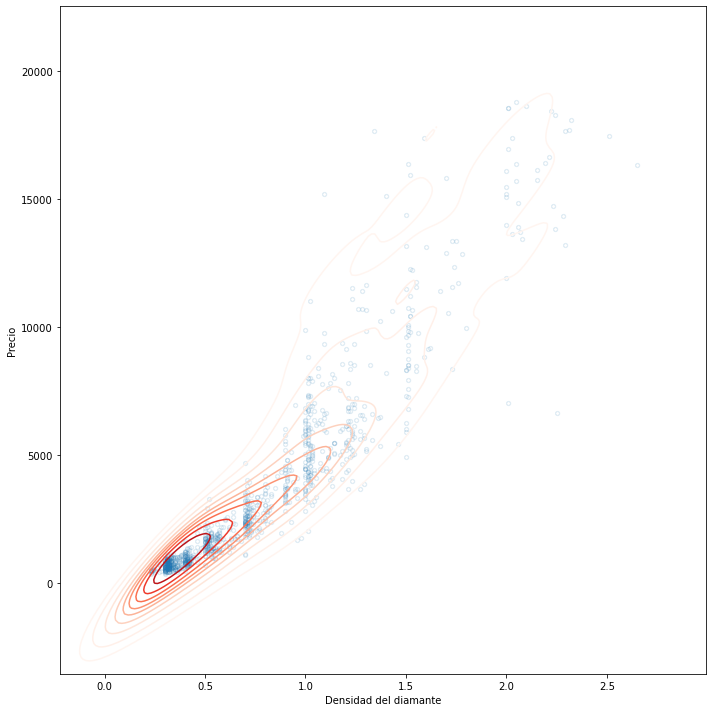

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(data=df_selec.sample(1000),
            x='carat',
            y='price',
            ax=ax,
            cmap="Reds")
df_selec.sample(1000).plot.scatter(x='carat',
                                   y='price',
                                   marker='$\u25EF$',
                                   alpha=0.1,
                                   ax=ax)
ax.set_xlabel('Densidad del diamante')
ax.set_ylabel('Precio')
plt.tight_layout()

# Interpretación:
# Lo mismo que antes pero viendo la visual desde un pista de vista de densidad topográfico

# Conclusión:
# Claramente se ve la alta corre lineal en densidades pequeñas, pero más adelante a misma densidad el precio puede variar más.

### Contingency table

In [72]:
crosstab = df_selec.pivot_table(index=['x'],columns=['y'],aggfunc=lambda x: len(x),margins=True)
crosstab

# Interpretación
# Conteo de dos o más variables categóricas

carat                                               ...    z            \
y       0.0 3.72 3.75 3.77 3.78  3.8 3.81 3.82 3.83 3.84  ... 9.42 9.46 9.59   
x                                                         ...                  
0.0     4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
3.77    NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
3.79    NaN  NaN  1.0  1.0  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
3.81    NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
3.82    NaN  NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
10.01   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
10.02   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
10.14   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
10.23   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
All     4.0  1.0  1.0  2.0  3.0  1.0  1.0  1.0  1.0  4.0  ...  1.0  1.0  1.0   

                                             
y     9.63 9.85 9.94 10.1 10.16 58.9    All  
x                                            
0.0    NaN  NaN  NaN  NaN   NaN  NaN      5  
3.77   NaN  NaN  NaN  NaN   NaN  NaN      1  
3.79   NaN  NaN  NaN  NaN   NaN  NaN      2  
3.81   NaN  NaN  NaN  NaN   NaN  NaN      1  
3.82   NaN  NaN  NaN  NaN   NaN  NaN      2  
...    ...  ...  ...  ...   ...  ...    ...  
10.01  NaN  NaN  1.0  NaN   NaN  NaN      1  
10.02  NaN  NaN  1.0  NaN   NaN  NaN      1  
10.14  NaN  NaN  NaN  1.0   NaN  NaN      1  
10.23  NaN  NaN  NaN  NaN   1.0  NaN      1  
All    1.0  1.0  2.0  1.0   1.0  1.0  40455  

[544 rows x 2700 columns]